# Movie Industry  correlation Project [link text](https://www.kaggle.com/datasets/danielgrijalvas/movies)

Import Libraries

In [ ]:
from pandas.errors import InvalidIndexError
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
matplotlib.rcParams['figure.figsize']=(12,8)

# Adjust configuration of the plots we will create 

Read the Data

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Sets/Movies Industries/movies.csv')
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [ ]:
df.info()

In [ ]:
df.describe()

In [70]:
df.dtypes

name            object
rating          object
genre           object
year             int64
released        object
score          float64
votes          float64
director        object
writer          object
star            object
country         object
budget         float64
gross          float64
company         object
runtime        float64
yearcorrect     object
dtype: object

let's see if there is any missing data ✈
 Let's loop through the data and see if there is anything missing

In [79]:
for col in df.columns:
    pct_missing=np.mean(df[col].isnull())
    print('{}  -  {} %'.format(col,pct_missing*100))

name  -  0.0 %
rating  -  0.0 %
genre  -  0.0 %
year  -  0.0 %
released  -  0.0 %
score  -  0.03912363067292645 %
votes  -  0.03912363067292645 %
director  -  0.0 %
writer  -  0.0 %
star  -  0.0 %
country  -  0.0 %
budget  -  28.31246739697444 %
gross  -  2.464788732394366 %
company  -  0.0 %
runtime  -  0.05216484089723526 %
yearcorrect  -  0.0 %


Change the datatypes of columns


In [ ]:
df['budget']=df['budget'].astype('int64')
df['gross']=df['gross'].astype('int64')
df

create correct year columns

In [94]:
df['yearcorrect']=df['released'].astype(str).str[:4]
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,6587,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000.0,46998772.0,2319,146.0,1705
1,5573,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000.0,58853106.0,731,104.0,1492
2,5142,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000.0,538375067.0,1540,124.0,1771
3,286,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000.0,83453539.0,1812,88.0,1492
4,1027,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000.0,39846344.0,1777,98.0,1543


sort data by gross value in ascending 

In [ ]:
df.sort_values(by=['gross'],ascending=False)
df.tail()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0,Octo
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0,Febr
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN,Apri
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0,Octo
7667,Tee em el,NaN,Horror,2020,"August 19, 2020 (United States)",5.7,7.0,Pereko Mosia,Pereko Mosia,Siyabonga Mabaso,South Africa,NaN,NaN,PK 65 Films,102.0,Augu


In [ ]:
pd.set_option('display.max_rows',None)
df.tail()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0,Octo
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0,Febr
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN,Apri
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0,Octo
7667,Tee em el,NaN,Horror,2020,"August 19, 2020 (United States)",5.7,7.0,Pereko Mosia,Pereko Mosia,Siyabonga Mabaso,South Africa,NaN,NaN,PK 65 Films,102.0,Augu


Drop any Duplicates

In [ ]:
df.drop_duplicates()
df.tail()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0,Octo
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0,Febr
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN,Apri
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0,Octo
7667,Tee em el,NaN,Horror,2020,"August 19, 2020 (United States)",5.7,7.0,Pereko Mosia,Pereko Mosia,Siyabonga Mabaso,South Africa,NaN,NaN,PK 65 Films,102.0,Augu


budget high correlation with company high,  
scatter plot with budget vs gross

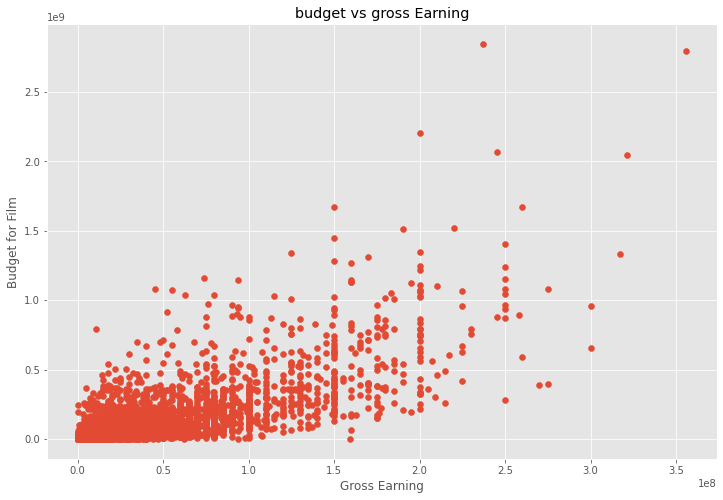

In [ ]:
plt.scatter(x=df['budget'],y=df['gross'])
plt.title('budget vs gross Earning')
plt.xlabel('Gross Earning')
plt.ylabel('Budget for Film')
plt.show()

plot Budget vs Gross using Seaborn

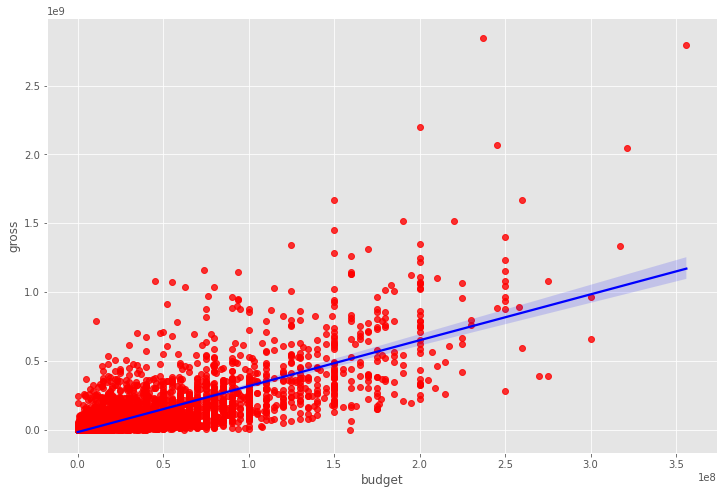

In [63]:
sns.regplot(x='budget',y='gross',data=df,scatter_kws={'color':'red'},line_kws={'color':"blue"})

There are three types of correlation 
1) Pearson 
2) Kendall
3) Spearman

Let's start looking at correlation 

In [64]:
df.corr(method='pearson')

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.329321,0.257486,0.120811
score,0.097995,1.000000,0.409182,0.076254,0.186258,0.399451
votes,0.222945,0.409182,1.000000,0.442429,0.630757,0.309212
budget,0.329321,0.076254,0.442429,1.000000,0.740395,0.320447
gross,0.257486,0.186258,0.630757,0.740395,1.000000,0.245216
runtime,0.120811,0.399451,0.309212,0.320447,0.245216,1.000000


High correlation between Budget and gross

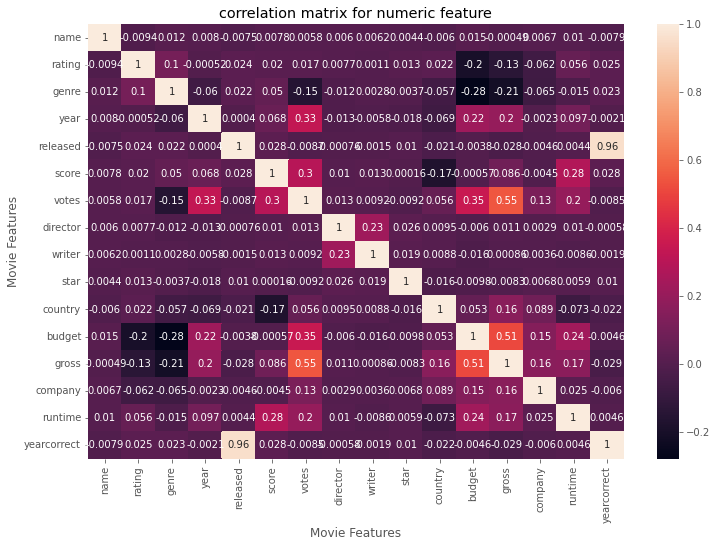

In [80]:
correlation_matrix=df.corr(method='kendall')
sns.heatmap(correlation_matrix,annot=True)
plt.title('correlation matrix for numeric feature')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

looks at company 

In [67]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,June
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,July
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,June
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,July
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,July


Numerised the Whole Table Containt

In [75]:
df_numerized=df
for col_name in df_numerized.columns:
    if (df_numerized[col_name].dtype=='object'):
        df_numerized[col_name]=df_numerized[col_name].astype('category')
        df_numerized[col_name]=df_numerized[col_name].cat.codes
df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,6587,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000.0,46998772.0,2319,146.0,14
1,5573,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000.0,58853106.0,731,104.0,13
2,5142,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000.0,538375067.0,1540,124.0,14
3,286,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000.0,83453539.0,1812,88.0,13
4,1027,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000.0,39846344.0,1777,98.0,13


Correlation Matrix With Numerized data

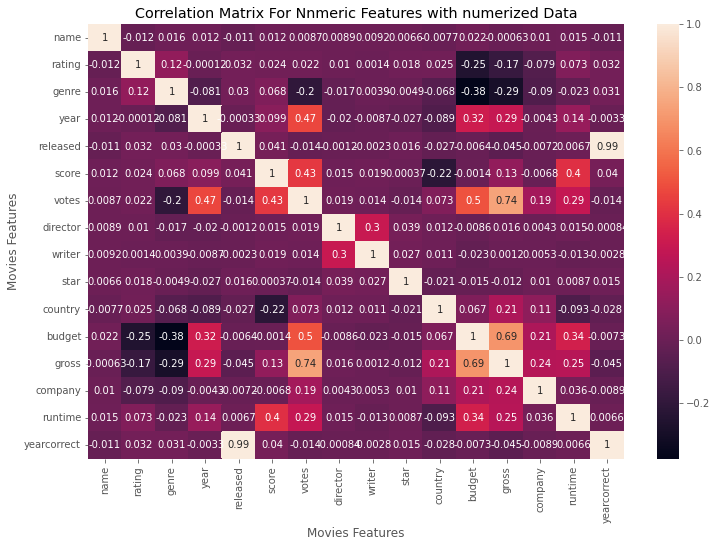

In [81]:
correlation_matrix=df_numerized.corr(method='spearman')
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix For Nnmeric Features with numerized Data')
plt.xlabel('Movies Features')
plt.ylabel('Movies Features')
plt.show()

In [83]:
df_numerized.corr().tail()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
budget,0.023970,-0.176002,-0.356564,0.329321,0.014683,0.076254,0.442429,-0.012272,-0.039451,-0.019589,0.054063,1.000000,0.740395,0.173214,0.320447,0.015682
gross,0.005533,-0.107339,-0.235650,0.257486,0.001659,0.186258,0.630757,-0.014441,-0.023519,-0.002717,0.092129,0.740395,1.000000,0.154840,0.245216,0.002946
company,0.009211,-0.032943,-0.071067,-0.010431,-0.010474,0.001030,0.133204,0.004404,0.005646,0.012442,0.095548,0.173214,0.154840,1.000000,0.034402,-0.010726
runtime,0.010392,0.062145,-0.052711,0.120811,0.000868,0.399451,0.309212,0.017624,-0.003511,0.010174,-0.078412,0.320447,0.245216,0.034402,1.000000,0.000410
yearcorrect,-0.011725,0.013475,0.028397,-0.001562,0.993694,0.040993,0.017337,-0.000105,-0.002892,0.015406,-0.022277,0.015682,0.002946,-0.010726,0.000410,1.000000


In the form of pairs

In [89]:
corelation_mat=df_numerized.corr()
corr_pairs=corelation_mat.unstack()
corr_pairs.tail()

yearcorrect  budget         0.015682
             gross          0.002946
             company       -0.010726
             runtime        0.000410
             yearcorrect    1.000000
dtype: float64

In the form of sorted Pairs

In [91]:
sorted_pairs=corr_pairs.sort_values()
sorted_pairs.head()

genre   budget   -0.356564
budget  genre    -0.356564
genre   gross    -0.235650
gross   genre    -0.235650
budget  rating   -0.176002
dtype: float64

To find the Highest correlation can be found as below

In [92]:
high_corr=sorted_pairs[(sorted_pairs)>0.5]
high_corr

votes        gross          0.630757
gross        votes          0.630757
             budget         0.740395
budget       gross          0.740395
yearcorrect  released       0.993694
released     yearcorrect    0.993694
name         name           1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
writer       writer         1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64